<a href="https://colab.research.google.com/github/hongkwangpyo/2020_deep_learning/blob/master/0811_2_Keras_CNN_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!ls '/content/gdrive/My Drive/Colab Notebooks/train'

ad  normal


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

In [5]:
np.random.seed(3)
tf.random.set_seed(3)

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/Colab Notebooks/train',
    target_size = (150, 150),
    batch_size=5,
    class_mode='binary'
)

Found 160 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/gdrive/My Drive/Colab Notebooks/test',
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'binary'
)

Found 120 images belonging to 2 classes.


In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = optimizers.Adam(learning_rate=0.0002),
              metrics=['accuracy'])

In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs=20,
    validation_data = test_generator,
    validation_steps=10
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
10/10 [==============================] - 28s 3s/step - loss: 0.6929 - accuracy: 0.4600 - val_loss: 0.7127 - val_accuracy: 0.4600
Epoch 2/20
10/10 [==============================] - 17s 2s/step - loss: 0.7413 - accuracy: 0.4600 - val_loss: 0.6871 - val_accuracy: 0.5600
Epoch 3/20
10/10 [==============================] - 12s 1s/step - loss: 0.6884 - accuracy: 0.5400 - val_loss: 0.7227 - val_accuracy: 0.3800
Epoch 4/20
10/10 [==============================] - 8s 798ms/step - loss: 0.6994 - accuracy: 0.5200 - val_loss: 0.6948 - val_accuracy: 0.4600
Epoch 5/20
10/10 [==============================] - 3s 345ms/step - loss: 0.6877 - accuracy: 0.5800 - val_loss: 0.6891 - val_accuracy: 0.6600
Epoch 6/20
10/10 [==============================] - 1s 145ms/step - loss: 0.6922 - accuracy: 0.4400 - val_loss: 0.6778 - val_accuracy: 0.6000
Epoch 7/20
10/10 [==============================] - 2s 154ms/step - loss: 0.69

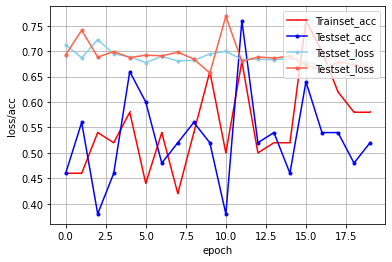

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker=',', c='r', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='b', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='skyblue', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='tomato', label='Testset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()